In [1]:
import os
import sys
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
# import plotly.express as px
import json

In [2]:
def get_json_file_list(dir_path):
    json_file_list = []
    for root, dirs, files in os.walk(dir_path):
        for file in files:
            if file.endswith(".json"):
                json_file_list.append(os.path.join(root, file))
    # print("Number of json files: {}".format(len(json_file_list)))
    return json_file_list

def load_jason_file(json_file):
    with open(json_file, 'r') as f:
        # print("file: {}".format(f))
        data = None
        try:
            data = json.load(f)
        except:
            print("Find Error: {}".format(json_file))
        return data
    
def load_dataframe_from_bunch_of_json_files(json_files):
    data = []
    for json_file in json_files:
        data.append(load_jason_file(json_file))
        # print("file: {}".format(json_file))
    # print("Number of json files: {}".format(len(data)))
    # print(data)
    # data["release"]
    return pd.DataFrame(data)

def caculate_df(df):
    df["cold_start_count"] = df["coldstart"].apply(lambda x: len(x))
    df["warm_start_count"] = df["warmstart"].apply(lambda x: len(x))
    df["func_invoc_count"] = df["cold_start_count"] + df["warm_start_count"]
    df["cold_start_percent"] = df["cold_start_count"] / df["func_invoc_count"]
    return df

def build_df(data_path):
    df = load_dataframe_from_bunch_of_json_files(get_json_file_list(data_path))
    # print(df)
    # df.head()
    df = caculate_df(df)
    # print(df)
    # df.head()
    return df

In [3]:
root_path = "../CE7490-data/"
# path_list = ["FixKeepAliveWindowPolicy_20/"]
path_list = ["FixKeepAliveWindowPolicy_5/", "FixKeepAliveWindowPolicy_10/",  "FixKeepAliveWindowPolicy_20/"]

hist_root = "HybridHistogramPolicy/"
hist_path_list = ["arima/", "fix/", "hist/"]
# hist_path_list = ["hist/"]

def concat_df(root_path, path_list):
    df_list = []
    for path in path_list:
        df_list.append(build_df(root_path + path))
    return pd.concat(df_list)

hist_df = concat_df(root_path + hist_root, hist_path_list)
# , "HybridHistogramPolicy/fix/", "HybridHistogramPolicy/arima/

In [4]:
# df_list = [df for df in build_df(root_path + path_list[])]
df_list = []

for path in path_list:
    data_path = root_path + path
    df = build_df(data_path)
    df_list.append(df)

    
# print(df_list)
# df_list[0].head()

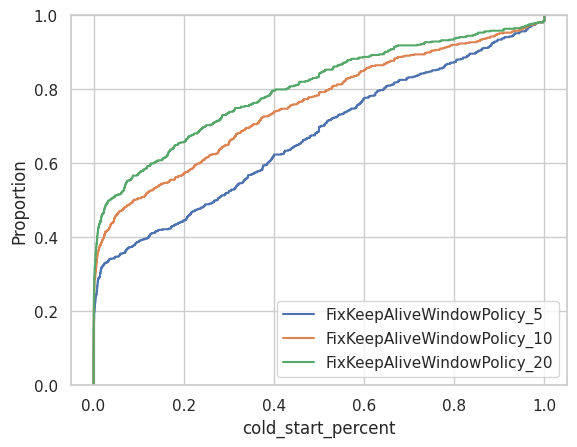

In [5]:
# df_dict = {"FixKeepAliveWindowPolicy_5": df_list[0], "FixKeepAliveWindowPolicy_10": df_list[1], "FixKeepAliveWindowPolicy_20": df_list[2], "HybridHistogramPolicy": hist_df}
df_dict = {"FixKeepAliveWindowPolicy_5": df_list[0], "FixKeepAliveWindowPolicy_10": df_list[1], "FixKeepAliveWindowPolicy_20": df_list[2]}

sns.set_theme(style="whitegrid")
sns.ecdfplot(x="cold_start_percent", data=df_dict["FixKeepAliveWindowPolicy_5"], label="FixKeepAliveWindowPolicy_5")
sns.ecdfplot(x="cold_start_percent", data=df_dict["FixKeepAliveWindowPolicy_10"], label="FixKeepAliveWindowPolicy_10")
sns.ecdfplot(x="cold_start_percent", data=df_dict["FixKeepAliveWindowPolicy_20"], label="FixKeepAliveWindowPolicy_20")
# sns.ecdfplot(x="cold_start_percent", data=df_dict["HybridHistogramPolicy"], label="HybridHistogramPolicy")
plt.legend(loc='lower right', labels=['FixKeepAliveWindowPolicy_5', 'FixKeepAliveWindowPolicy_10', 'FixKeepAliveWindowPolicy_20', 'HybridHistogramPolicy'])
plt.show()

In [6]:
# df_dict["FixKeepAliveWindowPolicy_5"].head()

AttributeError: 'str' object has no attribute 'head'

In [9]:
# def compute_cold_distrib(df, test_name):
#     # stats_df = df.groupby(test_name)[test_name].agg(["cold_start_count"]).pipe(pd.DataFrame)
#     stats_df = pd.DataFrame()
#     stats_df[test_name+'_pdf'] = df["cold_start_count"] / df["func_invoc_count"]
#     stats_df[test_name+'_cdf'] = stats_df[test_name+'_pdf'].cumsum()
    
#     return stats_df


In [12]:
# cdf = []
# test_list = ["FixKeepAliveWindowPolicy_5", "FixKeepAliveWindowPolicy_10",  "FixKeepAliveWindowPolicy_20",  "HybridHistogramPolicy"]
# i=0

# stats_df = pd.DataFrame()
# #     stats_df[test_name+'_pdf'] = df["cold_start_count"] / df["func_invoc_count"]
# #     stats_df[test_name+'_cdf'] = stats_df[test_name+'_pdf'].cumsum()
    
# for col in test_list:
#     stats_df[col+'_pdf'] = df_list[i]["cold_start_count"] / df_list[i]["func_invoc_count"]
#     stats_df[col+'_cdf'] = stats_df[col+'_pdf'].cumsum()
#     # cdf.append(compute_cold_distrib(df_list[i], col))
#     i+1
# cdf = pd.concat(cdf, ignore_index=True)

# sns.lineplot(data=cdf, dashes=False)
# # px.line(cdf, x="app_cold_start_percent", y="cdf", color="col", title="CDF of cold start count")
# # sns.set_theme(style="whitegrid")
# # sns.ecdfplot(data=df_list, x="cold_start_percent", hue="release", stat="count", common_norm=False, palette="crest")
# # plt.show()


TypeError: string indices must be integers

In [ ]:

sns.set_theme(style="darkgrid")
sns.ecdfplot(x="cold_start_percent", data=df)
plt.show()

In [5]:

# df["cold_start_count"] = df["coldstart"].apply(lambda x: len(x))
# df["warm_start_count"] = df["warmstart"].apply(lambda x: len(x))
# df["func_invoc_count"] = df["cold_start_count"] + df["warm_start_count"]
# df["warm_start_count"].head()
# # df["invoc_count"] = df["policy_record"].apply(lambda x: x["invoc_count"])
# # df["waste_memory_time"] = df["keeplive_win"].apply(lambda x: x[0][1]-x[0][0])
# df["cold_start_percent"] = df["cold_start_count"] / df["func_invoc_count"]
# # df["cold_start_percent_check"] = df["cold_start_count"].apply(lambda x: -1 if x>1 else 0).astype(int)
# # df["cold_start_percent_check"].value_counts()

# # # df["keeplive_win"].head() 
# # # df["waste_memory_time"] = df["keeplive_win"].apply(lambda x : np.array(x)[:,1]-np.array(x)[:, 0])
# # df["keeplive_win"].apply(lambda x : np.array(x, dtype=object).shape).head()
# # df["waste_memory_time"] = df["keeplive_win"].apply(lambda x : (np.array(x, dtype=object)[:,1]-np.array(x, dtype=object)[:, 0]) if np.array(x, dtype=object).shape[1] != None else np.zeros(np.array(x, dtype=object).shape))
# # df["waste_memory_time"].head()
# # df["cold_start_percent"].head(100)
# # df["invoc_count"].head()
# # # print(get_json_file_list(data_path)[2])

In [6]:
# df["func_invoc_count"].head()
# # df["invoc_count2"].head()
# # # all are timestampe 
# # dummy_data = {
# #     "release" : [],
# #     "coldstart" : [],
# #     "warmstart" : [],
# #     "warm_state" : [],
# #     "run_state" : [],
# #     "win_state" : [],
# #     "policy_record" : [],
# #     "obb_count" : [],
# # }


0      151
1     6068
2    20093
3     1897
4       23
Name: func_invoc_count, dtype: int64

In [7]:
# def count(data, key):
#     return len(data[key])

In [8]:
# def draw_line_chart(dataframe, x, y, hue = None):
#     sns.set_theme(style="darkgrid")
#     sns.lineplot(x=x, y=y, hue=hue, data=dataframe)
#     plt.show()
    
# def draw_bar_chart(dataframe, x, y, hue = None):
#     sns.set_theme(style="darkgrid")
#     sns.barplot(x=x, y=y, hue=hue, data=dataframe)
#     plt.show()
    
# def draw_cdf(dataframe, x, hue = None):
#     sns.set_theme(style="darkgrid")
#     sns.ecdfplot(x=x, hue=hue, data=dataframe)
#     plt.show()



In [9]:
# def draw_cold_start_cdf(dataframe, x="cold_start_percent", y="CDF"):
#     draw_cdf(dataframe, x, hue="policy")
    
# def draw_multi_cold_start_cdf(dataframe_list, x="cold_start_percent", y="CDF"):
#     for df in dataframe_list:
#         draw_cold_start_cdf(df, x, y)

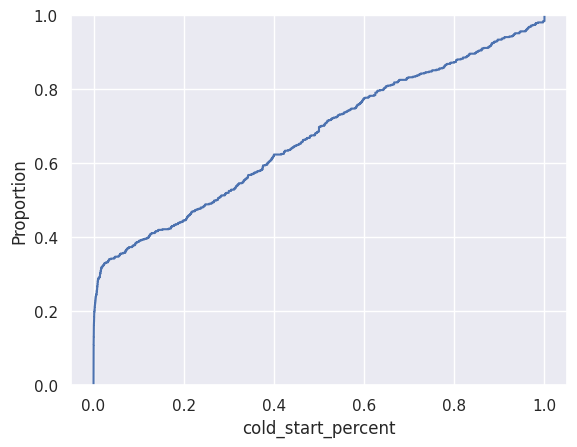

In [10]:
# (df, "cold_start_percent", hue="policy")

# sns.set_theme(style="darkgrid")
# sns.ecdfplot(x="cold_start_percent", data=df)
# plt.show()